# Python for Drilling Engineers - Module 3
## 1. 🔁 Recap & Today's Agenda
Let's quickly review what we covered in Lesson 2:
- Sorting, filtering, basic dataframe operations


## Today's Objectives
- DataFrames Continued...
  - Grouping & Aggregation
  - KPI Calculations with Groups
  - Slicing with `.loc[]`
- Data QA/QC Techniques
  - Use .isna(), .duplicated() for checks
  - Define your own thresholds (ex. ROP > 5000 fph = likely error)
  - Remove null placeholders from datasets (ex. -999.99)
  - IQR Outlier Removal
- Pandas Profiling Library/Reports
- **Bonus**: ML Concepts Overview

...but first, let's load our dataset.



In [22]:
import pandas as pd
run_number = [4, 5, 6, 7, 10, 11, 13, 15, 16, 17, 18, 23, 26, 27, 28, 30, 31, 32, 33]
start_time = ["10/30/2020 3:20", "11/4/2020 8:49", "11/7/2020 16:38", "11/9/2020 22:41", "11/14/2020 11:43",
              "11/15/2020 2:46", "11/20/2020 0:20", "11/24/2020 2:46", "11/25/2020 23:21", "11/26/2020 22:57",
              "11/28/2020 14:49", "12/3/2020 23:23", "12/7/2020 3:30", "12/8/2020 20:34", "12/9/2020 13:17",
              "12/12/2020 12:35", "12/13/2020 11:44", "12/17/2020 0:21", "12/18/2020 10:01"]
end_time = ["10/31/2020 4:27", "11/7/2020 6:25", "11/8/2020 22:54", "11/10/2020 14:58", "11/14/2020 16:20",
            "11/16/2020 13:28", "11/22/2020 6:35", "11/24/2020 18:30", "11/26/2020 10:40", "11/27/2020 19:57",
            "11/29/2020 9:39", "12/5/2020 6:59", "12/7/2020 23:55", "12/9/2020 0:21", "12/9/2020 15:31",
            "12/13/2020 0:54", "12/14/2020 8:19", "12/17/2020 18:38", "12/18/2020 23:58"]
run_duration = [25.11666667, 69.59722222, 30.26666667, 16.28333333, 4.616666667, 34.70277778, 54.25, 15.73333333,
                11.31666667, 21, 18.83333333, 31.6, 20.41666667, 3.783333333, 2.233333333, 12.31666667, 20.58333333,
                18.28333333, 13.95]
start_depth = [120.95001, 1629.09, 4552, 4964.7676, 5112, 5112.0776, 5505.0513, 5892.058, 6360.5713, 6527.22,
               6945.0454, 7389, 8024.0015, 8242.251, 8392.4375, 8535.091, 9064.573, 9747.119, 10490.042]
end_depth = [1629.0634, 4556.19, 4964.3687, 5113.364, 5379.8945, 5472.668, 5855.826, 6360.453, 6526.268, 6944.9404,
             7394.7295, 8024.3887, 8241.282, 8391.413, 8540.855, 9064.383, 9747.942, 10490.022, 10960.597]
run_length = [1508.11339, 2927.1, 412.3687, 148.5964, 267.8945, 360.5904, 350.7747, 468.395, 165.6967, 417.7204,
              449.6841, 635.3887, 217.2805, 149.162, 148.4175, 529.292, 683.369, 742.903, 470.555]
bit_make = ["NOV", "NOV", "Smith", "Smith", "Smith", "Ulterra", None, "NOV", "NOV", "NOV", "NOV", "NOV",
            "NOV", "NOV", "NOV", "NOV", "NOV", "NOV", "NOV"]
bit_model = ["TKC76", "TKC66", "MDSi616", "Z713S", "XS616", "U616M", None, "TKC63", "SKC613M", "SKC513M",
             "FTKC63-01", "TKC63", "SKC513M", "SKC613M", "SKC613M", "TKC63", "FTKC63-01", "TKC63", "TKC63"]
bit_od = [17.5, 12.25, 12.25, 12.25, 12.25, 12.25, None, 8.75, 8.75, 8.75, 8.75, 8.75, 8.75, 8.75, 8.75, 8.75,
          8.75, 8.75, 8.75]
motor = [False, True, True, True, True, True, None, True, True, True, True, True, True, True, True, True, True, True, True]
motor_make = [None, "Scout", "Scout", "Scout", "Scout", "Scout", None, "Scout", "Scout", "Scout", "Scout", "Scout",
              "Scout", "Scout", "Scout", "Scout", "Scout", "Scout", "Scout"]
motor_od = [None, 9.625, 9.625, 9.625, 9.625, 9.625, None, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5]
motor_config = [None, "7/8-5.9", "7/8-5.9", "7/8-5.9", "7/8-5.9", "7/8-3.0", None, "7/8-5.7", "7/8-5.7", "7/8-5.7",
                "7/8-5.7", "7/8-5.7", "7/8-5.7", "7/8-5.7", "7/8-5.7", "7/8-5.7", "7/8-5.7", "7/8-5.7", "7/8-5.7"]
rss = [True, True, True, True, True, True, None, False, False, False, False, False, False, False, False, False,
       False, False, False]
rss_make = ["Scout Vertical", "Scout Vertical", "Scout Vertical", "Scout Vertical", "Scout Vertical", "Scout Vertical",
            None, None, None, None, None, None, None, None, None, None, None, None, None]

# Create a new DataFrame with the provided data
bit_run_dict = {
    'run_number': run_number,
    'start_time': start_time,
    'end_time': end_time,
    'run_duration': run_duration,
    'start_depth': start_depth,
    'end_depth': end_depth,
    'run_length': run_length,
    'bit_make': bit_make,
    'bit_model': bit_model,
    'bit_od': bit_od,
    'motor': motor,
    'motor_make': motor_make,
    'motor_od': motor_od,
    'motor_config': motor_config,
    'rss': rss,
    'rss_make': rss_make
}
bit_run_df = pd.DataFrame(bit_run_dict)
bit_run_df['avg_rop'] = bit_run_df['run_length'] / bit_run_df['run_duration']

In [25]:
bit_run_df

,run_number,start_time,end_time,run_duration,start_depth,end_depth,run_length,bit_make,bit_model,bit_od,motor,motor_make,motor_od,motor_config,rss,rss_make,avg_rop
0,4,10/30/2020 3:20,10/31/2020 4:27,25.116667,120.95001,1629.0634,1508.11339,NOV,TKC76,17.50,False,None,NaN,None,True,Scout Vertical,60.044329
1,5,11/4/2020 8:49,11/7/2020 6:25,69.597222,1629.09000,4556.1900,2927.10000,NOV,TKC66,12.25,True,Scout,9.625,7/8-5.9,True,Scout Vertical,42.057713
2,6,11/7/2020 16:38,11/8/2020 22:54,30.266667,4552.00000,4964.3687,412.36870,Smith,MDSi616,12.25,True,Scout,9.625,7/8-5.9,True,Scout Vertical,13.624517
3,7,11/9/2020 22:41,11/10/2020 14:58,16.283333,4964.76760,5113.3640,148.59640,Smith,Z713S,12.25,True,Scout,9.625,7/8-5.9,True,Scout Vertical,9.125675
4,10,11/14/2020 11:43,11/14/2020 16:20,4.616667,5112.00000,5379.8945,267.89450,Smith,XS616,12.25,True,Scout,9.625,7/8-5.9,True,Scout Vertical,58.027690
5,11,11/15/2020 2:46,11/16/2020 13:28,34.702778,5112.07760,5472.6680,360.59040,Ulterra,U616M,12.25,True,Scout,9.625,7/8-3.0,True,Scout Vertical,10.390822
6,13,11/20/2020 0:20,11/22/2020 6:35,54.250000,5505.05130,5855.8260,350.77470,None,None,NaN,None,None,NaN,None,None,None,6.465893
7,15,11/24/2020 2:46,11/24/2020 18:30,15.733333,5892.05800,6360.4530,468.39500,NOV,TKC63,8.75,True,Scout,6.500,7/8-5.7,False,None,29.770869
8,16,11/25/2020 23:21,11/26/2020 10:40,11.316667,6360.57130,6526.2680,165.69670,NOV,SKC613M,8.75,True,Scout,6.500,7/8-5.7,False,None,14.641829
9,17,11/26/2020 22:57,11/27/2020 19:57,21.000000,6527.22000,6944.9404,417.72040,NOV,SKC513M,8.75,True,Scout,6.500,7/8-5.7,False,None,19.891448


## 2 🔹 Grouping with `.groupby()`

Grouping allows us to split our data into segments based on a column value, then perform calculations on each group independently.

### 🔧 Syntax
```python
df.groupby("column_name")


In [23]:
bit_run_df.groupby('bit_make').size()

bit_make
NOV        14
Smith       3
Ulterra     1
dtype: int64

In [24]:
bit_make_counts = bit_run_df.groupby('bit_make').size().reset_index(name='count')
bit_make_counts

,bit_make,count
0,NOV,14
1,Smith,3
2,Ulterra,1


In [ ]:
bit_runs_grouped = bit_run_df.groupby(['bit_od', 'bit_make']).size().reset_index(name='count')
bit_runs_grouped

## 3 📊 Aggregating Multiple Metrics with `.agg()`

Aggregation is how we apply multiple statistical functions to grouped data. This is where `.agg()` shines.

### 🔧 Syntax
```python
df.groupby("bit_model").agg({
    "rop": "mean",
    "torque": "max",
    "wob": "std"
})
```

### 📌 Why It Matters
You can quickly create summary reports that show how different combinations of equipment perform:
- Which bit models produce the highest ROP?
- Which motor configurations generate the most torque?
- Where is the variability the highest?

Hands-on: Use `.agg()` to summarize 2-3 performance metrics for a key grouping (e.g., `run_number`, `bit_make`, or `interval_type`)


In [ ]:
bit_runs_grouped = bit_run_df.groupby(['bit_od', 'bit_make']).agg(
    count=('run_number', 'size'),
    avg_run_duration=('run_duration', 'mean'),
    avg_run_length=('run_length', 'mean'),
).reset_index()
bit_runs_grouped

**Now you try**

Group by bit_od and bit_make. Then calculate avg_rop for each group.

In [ ]:
# Type your code here

## 4 🔍 Slicing Data with `.loc[]`

`.loc[]` allows us to filter rows and select specific columns, all in one go.

### 🔧 Syntax
```python
df.loc[condition, ["column1", "column2"]]
```

### 📌 Example
Filter out runs with large bits:
```python
df.loc[df["bit_od"] > 8.5, ["bit_model", "avg_rop", "run_duration", "run_length"]]
```

You can also combine multiple conditions using `&` (and) or `|` (or):
```python
df.loc[(df["motor"] == True) & (df["formation"] == "Wolfcamp")]
```

Use `.loc[]` when you want precision and control while filtering or subsetting your dataset.


In [ ]:
screen = (bit_run_df.bit_od == 8.75)
bit_run_df.loc[screen, 'bit_make']

In [ ]:
screen = (bit_run_df.bit_od == 8.75)
bit_run_df.loc[screen, 'bit_make'] = 'National Oilwell Varco'
bit_run_df

## 4 🧪 Data QA/QC: Catching Dirty Data Before It Catches You

Before diving into analysis or modeling, you must understand the quality of your data.

### ⚠️ Common Issues
- Missing values (NaNs)
- Duplicate rows
- Out-of-range or impossible values (e.g., RPM > 1000)

### 🔧 Tools for QA/QC
```python
df.isna().sum()             # Count missing values
df.duplicated().sum()       # Count duplicates
df.describe()               # Quick sanity check on ranges
IQR Outlier Removal         # Remove outliers with inter-quartile-range method
```

### 🧠 Drilling-Specific QC Ideas
- Is depth ever negative?
- Are there values beyond what’s physically possible?
- Does every run have a start and end time?

Hands-on: Write a few simple checks to flag suspect rows. For example:
```python
df[df["rpm"] > 500]
```

Think of this as debugging your dataset before launching your analysis.


Import on_btm_df locally.

In [1]:
import pandas as pd
# Load the on_btm_df from a CSV file
file_name = 'on_btm_df.csv'
# get current directory
import os
current_directory = os.getcwd()
file_path = os.path.join(current_directory, file_name)
print(file_path)
on_btm_df = pd.read_csv(file_path)

c:\Users\RDavis\Desktop\Github\python-for-drilling-engineers\module_3\on_btm_df.csv


from Google Drive

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

file_name = 'on_btm_df.csv'  # Replace with your file name once uploaded to Google Drive

file_path = f'/content/drive/My Drive/python-for-drilling-engineers/module_2/{file_name}'

on_btm_df = pd.read_csv(file_path)

### Missing Data, Duplicate Data, Quick Checks
```python
df.info()                   # Quick column check and null counts
df.isna().sum()             # Count missing values
df.duplicated().sum()       # Count duplicates
df.describe()               # Quick sanity check on ranges
```

In [2]:
on_btm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117464 entries, 0 to 117463
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rig_time          117464 non-null  object 
 1   md                117183 non-null  float64
 2   rop               117415 non-null  float64
 3   wob               117415 non-null  float64
 4   diff_press        117464 non-null  float64
 5   td_rpm            117462 non-null  float64
 6   td_torque         117462 non-null  float64
 7   bit_rpm           107748 non-null  float64
 8   block_height      117464 non-null  float64
 9   inc               112336 non-null  float64
 10  azi               112336 non-null  float64
 11  bit_size          111855 non-null  float64
 12  on_bottom_status  117464 non-null  int64  
 13  run_number        104312 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 12.5+ MB


In [3]:
on_btm_df.isna().sum()

rig_time                0
md                    281
rop                    49
wob                    49
diff_press              0
td_rpm                  2
td_torque               2
bit_rpm              9716
block_height            0
inc                  5128
azi                  5128
bit_size             5609
on_bottom_status        0
run_number          13152
dtype: int64

In [4]:
on_btm_df.duplicated().sum()

np.int64(15)

In [5]:
on_btm_df.describe()

,md,rop,wob,diff_press,td_rpm,td_torque,bit_rpm,block_height,inc,azi,bit_size,on_bottom_status,run_number
count,117183.000000,117415.000000,117415.000000,117464.000000,117462.000000,117462.000000,107748.000000,117464.000000,112336.000000,112336.000000,111855.000000,117464.0,104312.000000
mean,6060.544848,32.620860,35.384567,191.502201,42.847375,4658.313413,227.253870,47.475850,22.957267,121.952936,10.667954,1.0,15.086864
std,3238.614926,219.767161,31.663469,730.571972,20.466793,3384.662078,987.986366,28.215165,28.621076,73.322569,1.599879,0.0,9.342820
min,0.000020,-999.990000,-999.990000,-4751.216300,0.000000,0.000000,0.000000,-19.453900,0.000000,0.000000,8.750000,1.0,4.000000
25%,4897.156250,0.000000,30.102370,92.101825,34.446370,2803.165500,132.240720,24.087515,1.230000,99.560000,8.750000,1.0,6.000000
50%,5766.447300,11.863850,40.024850,158.736760,41.551020,4052.496600,159.178480,50.373950,1.710000,108.380000,12.000000,1.0,13.000000
75%,7576.682000,42.409090,47.130415,217.000972,56.082350,5251.206500,185.730130,70.513903,59.880000,144.220000,12.000000,1.0,23.000000
max,735423.000000,40989.590000,323.905240,8598.290000,131.365700,17174.247940,19591.795000,107.646930,91.380000,358.060000,12.250000,1.0,33.000000


#### Removing Null Values and -999's

In [7]:
# Replace Null Values with 0 in the 'rop' and 'wob' columns
columns_to_replace = ['rop', 'wob', 'diff_press', 'td_rpm', 'td_torque']
on_btm_df[columns_to_replace].fillna(0, inplace=True)
on_btm_df['wob'].fillna(0, inplace=True)
# Verify that the null values have been replaced
on_btm_df.info()  # Check the DataFrame info again to ensure no nulls in 'rop' and 'wob'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117464 entries, 0 to 117463
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rig_time          117464 non-null  object 
 1   md                117183 non-null  float64
 2   rop               117415 non-null  float64
 3   wob               117464 non-null  float64
 4   diff_press        117464 non-null  float64
 5   td_rpm            117462 non-null  float64
 6   td_torque         117462 non-null  float64
 7   bit_rpm           107748 non-null  float64
 8   block_height      117464 non-null  float64
 9   inc               112336 non-null  float64
 10  azi               112336 non-null  float64
 11  bit_size          111855 non-null  float64
 12  on_bottom_status  117464 non-null  int64  
 13  run_number        104312 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 12.5+ MB


C:\Users\RDavis\AppData\Local\Temp\ipykernel_19648\2671341834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_btm_df[columns_to_replace].fillna(0, inplace=True)
C:\Users\RDavis\AppData\Local\Temp\ipykernel_19648\2671341834.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  on_btm_df['wob'].fillna(0, inplace=True)


In [8]:
# Replace -999 values with None in the 'rop' and 'wob' columns
on_btm_df.loc[on_btm_df['rop'] == -999.99, 'rop'] = None
on_btm_df.loc[on_btm_df['wob'] == -999.99, 'wob'] = None

# Alternative method using replace
# on_btm_df['rop'].replace(-999.99, None, inplace=True)
# on_btm_df['wob'].replace(-999.99, None, inplace=True)

# Verify that the -999 values have been replaced
on_btm_df.describe()

,md,rop,wob,diff_press,td_rpm,td_torque,bit_rpm,block_height,inc,azi,bit_size,on_bottom_status,run_number
count,117183.000000,117370.000000,117419.000000,117464.000000,117462.000000,117462.000000,107748.000000,117464.000000,112336.000000,112336.000000,111855.000000,117464.0,104312.000000
mean,6060.544848,33.016766,35.766600,191.502201,42.847375,4658.313413,227.253870,47.475850,22.957267,121.952936,10.667954,1.0,15.086864
std,3238.614926,218.877010,24.332644,730.571972,20.466793,3384.662078,987.986366,28.215165,28.621076,73.322569,1.599879,0.0,9.342820
min,0.000020,-999.000000,-999.000000,-4751.216300,0.000000,0.000000,0.000000,-19.453900,0.000000,0.000000,8.750000,1.0,4.000000
25%,4897.156250,0.000000,30.102260,92.101825,34.446370,2803.165500,132.240720,24.087515,1.230000,99.560000,8.750000,1.0,6.000000
50%,5766.447300,11.885600,40.024770,158.736760,41.551020,4052.496600,159.178480,50.373950,1.710000,108.380000,12.000000,1.0,13.000000
75%,7576.682000,42.420322,47.130355,217.000972,56.082350,5251.206500,185.730130,70.513903,59.880000,144.220000,12.000000,1.0,23.000000
max,735423.000000,40989.590000,323.905240,8598.290000,131.365700,17174.247940,19591.795000,107.646930,91.380000,358.060000,12.250000,1.0,33.000000


###  Remove Outliers with IQR Method

First, let's filter down the dataframe to just the runs we want to look at (18, 23, 26) and rotating only data.

In [9]:
run_analysis_df = on_btm_df.copy()  # Create a copy of the DataFrame for analysis
param_name_list = ['rop', 'wob', 'td_rpm', 'td_torque', 'diff_press']
rpm_rotating_thresh = 40  # RPM threshold for rotating
torque_rotating_thresh = 5000  # Torque threshold for rotating
run_number_list = [18, 23, 26]  # List of run numbers to analyze

run_screen = (on_btm_df['run_number'].isin(run_number_list))  # Filter the DataFrame to only include the run numbers in the list
rotating_screen = (on_btm_df['td_rpm'] > rpm_rotating_thresh) & (on_btm_df['td_torque'] > torque_rotating_thresh)
run_analysis_df = on_btm_df[run_screen & rotating_screen]

print("\n\n Filtered DataFrame before Outlier Removal:")
run_analysis_df.describe()  # Display the statistics of the filtered DataFrame before outlier removal



 Filtered DataFrame before Outlier Removal:


,md,rop,wob,diff_press,td_rpm,td_torque,bit_rpm,block_height,inc,azi,bit_size,on_bottom_status,run_number
count,7025.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,6567.000000,6567.000000,7036.00,7036.0,7036.000000
mean,7611.997353,35.976853,43.219935,189.434233,55.749187,8329.266747,192.413539,44.007402,59.306671,105.556464,8.75,1.0,21.620381
std,369.858877,37.340951,13.350297,115.629575,9.686534,645.452591,18.070831,28.555849,8.683013,11.816059,0.00,0.0,3.239044
min,6951.528300,0.000000,0.000000,-534.774800,40.343430,5220.834000,140.761600,-2.764350,0.000000,0.000000,8.75,1.0,18.000000
25%,7285.906200,0.000000,40.259828,156.754278,49.319850,7883.508300,185.238563,22.286172,57.660000,103.860000,8.75,1.0,18.000000
50%,7575.251000,37.919910,49.644090,201.256975,50.225540,8288.478000,187.071300,39.049395,59.880000,106.370000,8.75,1.0,23.000000
75%,7977.923300,53.270740,50.115915,233.640192,68.802310,8758.242000,204.682025,65.328068,63.600000,110.280000,8.75,1.0,23.000000
max,8241.282000,1043.216900,53.595340,2644.187500,76.651640,11240.706000,339.924130,100.021250,66.510000,111.580000,8.75,1.0,26.000000


In [10]:
def remove_outliers_per_column(df, column_names):
    # Fill NaNs once for all selected columns
    df[column_names] = df[column_names].fillna(0)
    
    for col in column_names:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Group by run_number and apply the outlier removal
all_run_df = (
    run_analysis_df[run_analysis_df['run_number'].isin(run_number_list)]
    .groupby('run_number', group_keys=False)
    .apply(lambda df: remove_outliers_per_column(df.copy(), param_name_list))
)

print("\n\n Filtered DataFrame after Outlier Removal:")
all_run_df.describe()  # Display the statistics of the filtered DataFrame after outlier removal



 Filtered DataFrame after Outlier Removal:


C:\Users\RDavis\AppData\Local\Temp\ipykernel_19648\115710176.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: remove_outliers_per_column(df.copy(), param_name_list))


,md,rop,wob,diff_press,td_rpm,td_torque,bit_rpm,block_height,inc,azi,bit_size,on_bottom_status,run_number
count,6318.000000,6329.00000,6329.000000,6329.000000,6329.000000,6329.000000,6329.000000,6329.000000,5888.000000,5888.000000,6329.00,6329.0,6329.000000
mean,7628.288283,32.83432,43.127846,181.217550,55.944479,8329.981440,192.198726,43.782748,59.854789,105.558568,8.75,1.0,21.752568
std,361.951433,25.66118,13.728893,88.092147,9.786272,591.058412,18.198143,27.888520,8.062454,12.399040,0.00,0.0,3.240919
min,7043.010700,0.00000,0.000000,-138.379930,40.343430,6579.506300,140.761600,-2.764350,0.000000,0.000000,8.75,1.0,18.000000
25%,7297.227475,0.00000,42.626440,156.245160,49.319850,7895.657700,184.955080,23.048820,58.130000,103.860000,8.75,1.0,18.000000
50%,7588.252000,36.99356,49.689910,199.963400,50.225540,8290.503000,186.934170,38.857950,60.260000,106.370000,8.75,1.0,23.000000
75%,8022.975050,51.14291,50.127360,228.074370,68.822430,8740.019000,204.875870,62.930730,63.990000,110.280000,8.75,1.0,23.000000
max,8241.282000,134.01707,51.938870,510.563600,76.651640,10141.214000,339.924130,99.177360,66.510000,111.580000,8.75,1.0,26.000000


In [ ]:
all_run_df.to_csv('all_run_df.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd

# Bin sizes
depth_bin_size = 25
wob_bin_size = 5
rpm_bin_size = 5

# Make copies so we don't modify original
df = all_run_df.copy()

# filter for rotating only with simple filters
df = df[(df['td_rpm'] > 40) & (df['td_torque'] > 5000)]

# Add depth bin
df['depth_bin'] = (df['md'] // depth_bin_size) * depth_bin_size

# Bin WOB and RPM
df['wob_bin'] = (df['wob'] // wob_bin_size) * wob_bin_size
df['rpm_bin'] = (df['td_rpm'] // rpm_bin_size) * rpm_bin_size

# Prepare results list
results = []

# Group by depth bin
for depth_bin, group in df.groupby('depth_bin'):
    # Pivot table of average ROP for each (wob_bin, rpm_bin) in this depth bin
    heatmap = group.pivot_table(
        index='wob_bin',
        columns='rpm_bin',
        values='rop',
        aggfunc= 'mean'
    )

    # create a similar pivot table with the values being the count of occurrences
    heatmap_count = group.pivot_table(
        index='wob_bin',
        columns='rpm_bin',
        values='rop',
        aggfunc='count'
    )

    # Skip if heatmap is empty (e.g., not enough data in this depth interval)
    if heatmap.empty:
        continue

    # Find the optimal combination
    max_rop = heatmap.max().max()
    opt_rpm = heatmap.max().idxmax()
    opt_wob = heatmap[opt_rpm].idxmax()

    # print('-----------------------')
    # print(heatmap_count)
    # print(f"Depth Bin: {depth_bin}, Optimum WOB: {opt_wob}, Optimum RPM: {opt_rpm}, Max ROP: {max_rop}")

    # Append to results
    results.append({
        'start_depth': depth_bin,
        'end_depth': depth_bin + depth_bin_size,
        'optimum_wob': opt_wob,
        'optimum_rpm': opt_rpm,
        'target_rop': max_rop
    })

# Convert to DataFrame
optimum_param_df = pd.DataFrame(results)

# Show the result
optimum_param_df

-----------------------
rpm_bin  45.0  50.0
wob_bin            
45.0        5    20
50.0        1     9
Depth Bin: 7025.0, Optimum WOB: 50.0, Optimum RPM: 50.0, Max ROP: 79.0153211111111
-----------------------
rpm_bin  50.0
wob_bin      
45.0        3
Depth Bin: 7050.0, Optimum WOB: 45.0, Optimum RPM: 50.0, Max ROP: 58.56130999999999
-----------------------
rpm_bin  45.0  50.0
wob_bin            
45.0       55    33
50.0       42    12
Depth Bin: 7075.0, Optimum WOB: 50.0, Optimum RPM: 50.0, Max ROP: 70.94515750000001
-----------------------
rpm_bin  45.0  50.0
wob_bin            
45.0      105    47
50.0       22    16
Depth Bin: 7100.0, Optimum WOB: 50.0, Optimum RPM: 45.0, Max ROP: 49.40393772727273
-----------------------
rpm_bin  45.0  50.0
wob_bin            
45.0       54     3
50.0       40     3
Depth Bin: 7125.0, Optimum WOB: 50.0, Optimum RPM: 50.0, Max ROP: 42.33747666666667
-----------------------
rpm_bin  45.0  50.0
wob_bin            
45.0       73    15
50.0       75  

,start_depth,end_depth,optimum_wob,optimum_rpm,target_rop
0,7025.0,7050.0,50.0,50.0,79.015321
1,7050.0,7075.0,45.0,50.0,58.561310
2,7075.0,7100.0,50.0,50.0,70.945158
3,7100.0,7125.0,50.0,45.0,49.403938
4,7125.0,7150.0,50.0,50.0,42.337477
5,7150.0,7175.0,45.0,50.0,46.017189
6,7175.0,7200.0,50.0,50.0,34.530478
7,7200.0,7225.0,50.0,50.0,36.146710
8,7225.0,7250.0,45.0,45.0,33.767478
9,7250.0,7275.0,45.0,50.0,31.319323


C:\Users\RDavis\AppData\Local\Temp\ipykernel_19648\3561678720.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: remove_outliers_per_column(df.copy(), param_name_list))


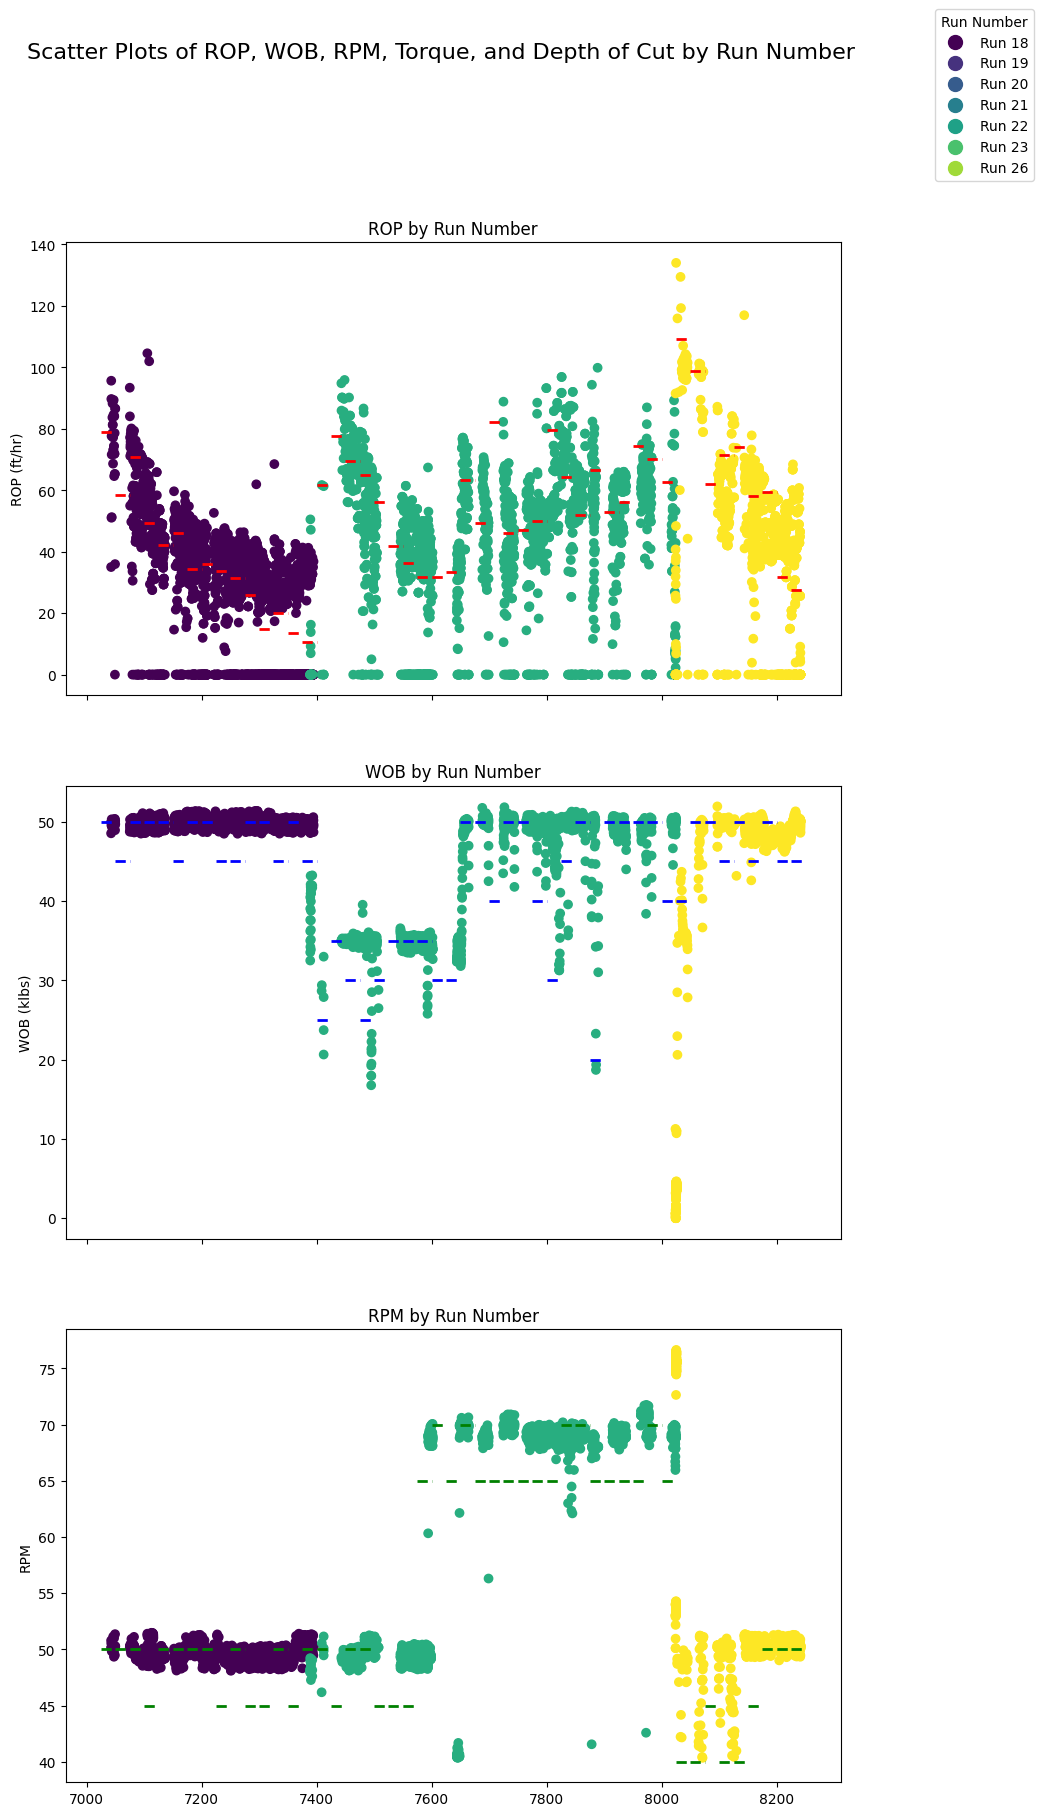

In [40]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
# Create a set of horizontal subplots to plot a scatter plot of the data with x-axis as 'rig_time', and y-axis as 'rop', 'wob', 'td_rpm', 'td_torque', and 'depth_of_cut' colored by the runs in the run_number column.
# The subplots will be arranged in a 5x1 grid.
run_number_list = [18, 19, 20, 21, 22, 23, 26]
run_analysis_df = on_btm_df.copy()  # Create a copy of the DataFrame for analysis
param_name_list = ['rop', 'wob', 'td_rpm']
rpm_rotating_thresh = 40  # RPM threshold for rotating
torque_rotating_thresh = 5000  # Torque threshold for rotating

run_screen = (on_btm_df['run_number'].isin(run_number_list))  # Filter the DataFrame to only include the run numbers in the list
rotating_screen = (on_btm_df['td_rpm'] > rpm_rotating_thresh) & (on_btm_df['td_torque'] > torque_rotating_thresh)
run_analysis_df = on_btm_df[run_screen & rotating_screen]

def remove_outliers_per_column(df, column_names):
    # Fill NaNs once for all selected columns
    df[column_names] = df[column_names].fillna(0)
    
    for col in column_names:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Group by run_number and apply the outlier removal
all_run_df = (
    run_analysis_df[run_analysis_df['run_number'].isin(run_number_list)]
    .groupby('run_number', group_keys=False)
    .apply(lambda df: remove_outliers_per_column(df.copy(), param_name_list))
)

# Create a color map dictionary for each run number
color_map_dict = {run_number: plt.cm.viridis(i / len(run_number_list)) for i, run_number in enumerate(run_number_list)}
all_run_df['color'] = all_run_df['run_number'].map(color_map_dict)

fig, axs = plt.subplots(3, 1, figsize=(10, 20), sharex=True)
fig.suptitle('Scatter Plots of ROP, WOB, RPM, Torque, and Depth of Cut by Run Number', fontsize=16)
axs[0].scatter(all_run_df['md'], all_run_df['rop'], c=all_run_df['run_number'], cmap='viridis')
axs[0].set_ylabel('ROP (ft/hr)')
axs[0].set_title('ROP by Run Number')
axs[1].scatter(all_run_df['md'], all_run_df['wob'], c=all_run_df['run_number'], cmap='viridis')
axs[1].set_ylabel('WOB (klbs)')
axs[1].set_title('WOB by Run Number')
axs[2].scatter(all_run_df['md'], all_run_df['td_rpm'], c=all_run_df['run_number'], cmap='viridis')
axs[2].set_ylabel('RPM')
axs[2].set_title('RPM by Run Number')

# Add optimum parameter plots:

# Iterate through each row in the optimum_param_df
for idx, row in optimum_param_df.iterrows():
    start = row['start_depth']
    end = row['end_depth']

    # Plot horizontal lines for each parameter
    axs[0].hlines(y=row['target_rop'], xmin=start, xmax=end, colors='red', linestyles='dashed', linewidth=2)
    axs[1].hlines(y=row['optimum_wob'], xmin=start, xmax=end, colors='blue', linestyles='dashed', linewidth=2)
    axs[2].hlines(y=row['optimum_rpm'], xmin=start, xmax=end, colors='green', linestyles='dashed', linewidth=2)


# Create legend using the color_map_dict
handles = [Line2D([0], [0], marker='o', color=color_map_dict[run_number], markersize=10, linestyle='') 
           for run_number in run_number_list]
labels = [f'Run {run_number}' for run_number in run_number_list]

# Add the legend to the figure (not axs, since axs is an array of subplots)
fig.legend(handles, labels, title='Run Number', loc='upper right', bbox_to_anchor=(1.1, 1))



#### Pandas Profiling Library

In [ ]:
# If running on GoogleColab, you must pip install ydata-profiling before running the next cell
!pip install ydata-profiling

# Generate a profile report
from ydata_profiling import ProfileReport
profile = ProfileReport(on_btm_df, title="Forge 16A Data Analysis", explorative=True)
profile.to_notebook_iframe()
# Save the profile report to an HTML file
profile.to_file(output_file="forge_16A_on_btm_report.html")